In [ ]:
#importamos los datos necesarios
#dataset escogido = https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set?select=test


In [1]:
#conectamos a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import torch

In [ ]:
#descomprimir el zip
ruta_del_archivo ="/content/drive/MyDrive/datasets/dataset_perros.zip"
ruta_de_destino= "/content"
!unzip '/content/drive/MyDrive/datasets/dataset_perros.zip' -d '/content/dataset'
!unzip '/content/drive/MyDrive/datasets/dataset_perros.zip' -d '/content'

In [3]:
import pandas as pd
from torchvision.datasets import CIFAR10
from torchvision import transforms
from PIL import Image
import os

# Cargar el CSV que contiene las rutas de las imágenes y sus etiquetas
ruta_csv = "/content/dogs.csv"
datos_csv = pd.read_csv(ruta_csv)

# Define la transformación para redimensionar las imágenes a 32x32 píxeles
transformacion = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# Lista para almacenar las imágenes y etiquetas
imagenes = []
etiquetas = []

# Iterar sobre las filas del CSV para cargar las imágenes y etiquetas
for indice, fila in datos_csv.iterrows():
    ruta_imagen = fila['filepaths']  # Suponiendo que la columna con las rutas de las imágenes se llama 'ruta_imagen'
    etiqueta = fila['labels']  # Suponiendo que la columna con las etiquetas se llama 'etiqueta'

    # Abrir la imagen y aplicar la transformación
    imagen = Image.open(ruta_imagen)
    imagen_transformada = transformacion(imagen)

    # Agregar la imagen y etiqueta a las listas
    imagenes.append(imagen_transformada)
    etiquetas.append(etiqueta)

# Crea el conjunto de datos CIFAR-10 personalizado
cifar10_personalizado = [(imagen, etiqueta) for imagen, etiqueta in zip(imagenes, etiquetas)]

# Ahora puedes usar este conjunto de datos personalizado


In [6]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
n_datos = len(cifar10_personalizado)
n_train = int(0.8 * n_datos)
n_test = n_datos - n_train
trainset, testset = torch.utils.data.random_split(cifar10_personalizado, [n_train, n_test])

# Ahora puedes utilizar train_set y test_set para entrenar y probar tu modelo

In [15]:
import pandas as pd
df = pd.read_csv("/content/dataset/dogs.csv",sep=",")
mask_train=df['data set'] == "train"
mask_train=df['data set'] == "test"
df[mask_train]

,filepaths,labels,data set
7946,test/Afghan/01.jpg,Afghan,test
7947,test/Afghan/02.jpg,Afghan,test
7948,test/Afghan/03.jpg,Afghan,test
7949,test/Afghan/04.jpg,Afghan,test
7950,test/Afghan/05.jpg,Afghan,test
...,...,...,...
8641,test/Yorkie/06.jpg,Yorkie,test
8642,test/Yorkie/07.jpg,Yorkie,test
8643,test/Yorkie/08.jpg,Yorkie,test
8644,test/Yorkie/09.jpg,Yorkie,test


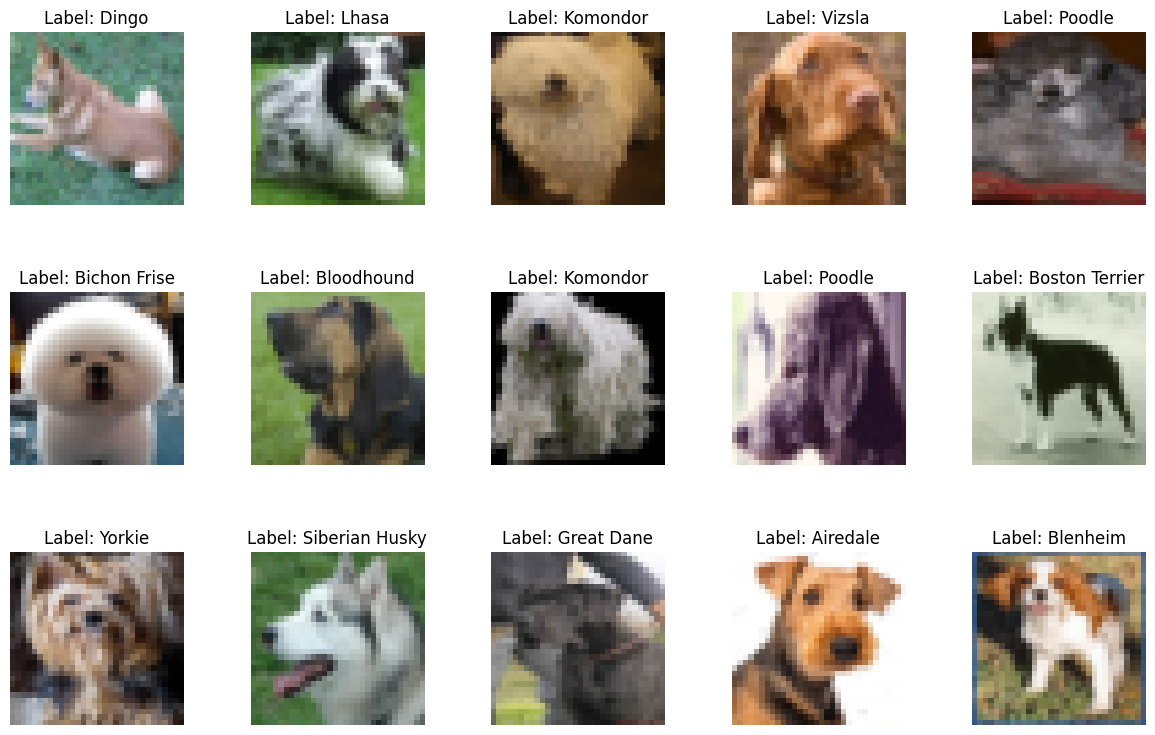

In [7]:
import random
import matplotlib.pyplot as plt

# Definir el número de filas y columnas para mostrar las imágenes
r, c = 3, 5

# Obtener una muestra aleatoria de índices del conjunto de entrenamiento
indices = random.sample(range(len(trainset)), r*c)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(c*3, r*3))

# Iterar sobre las filas y columnas para mostrar las imágenes
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)

        # Obtener la imagen y la etiqueta correspondiente para el índice actual
        img, label = trainset[indices[index]]

        # Mostrar la imagen y configurar los ejes
        plt.imshow(img.permute(1, 2, 0))  # La imagen se convierte de (C, H, W) a (H, W, C) para que matplotlib pueda mostrarla correctamente
        plt.axis('off')
        plt.title(f'Label: {label}')  # Mostrar la etiqueta como título

# Ajustar el espacio entre las imágenes en la figura
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Mostrar la figura con las imágenes
plt.show()


In [8]:
# convertimos imágenes a arrays de numpy

import numpy as np

train_images = np.array([np.array(img) for img, label in trainset])
test_images = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
test_labels = np.array([label for img, label in testset])

In [9]:
# ver número de imágenes, resolución y número de canales

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((7476, 3, 32, 32), (1870, 3, 32, 32), (7476,), (1870,))

In [10]:
# tipo de datos

train_images.dtype, train_labels.dtype

(dtype('float32'), dtype('<U17'))

In [11]:
# estadísiticos

max_value = train_images.max(axis=(0, 1, 2))
min_value = train_images.min(axis=(0, 1, 2))

max_value, min_value

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [12]:
mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.0019522 , 0.00194441, 0.00192935, 0.00191462, 0.00189974,
        0.00188081, 0.00186442, 0.00185081, 0.00183946, 0.00183426,
        0.00183502, 0.00183811, 0.00184257, 0.00184518, 0.00184536,
        0.00184787, 0.00184857, 0.00184926, 0.00185039, 0.00185021,
        0.00185041, 0.00185087, 0.00185193, 0.00185766, 0.00186845,
        0.0018816 , 0.001895  , 0.00190876, 0.00192014, 0.00193162,
        0.00194434, 0.00195192], dtype=float32),
 array([0.00106587, 0.00104784, 0.00103309, 0.0010217 , 0.00101338,
        0.00100526, 0.0009983 , 0.00099247, 0.00098901, 0.00098603,
        0.00098345, 0.00098348, 0.00098657, 0.00098897, 0.00098865,
        0.0009899 , 0.00099058, 0.00098891, 0.00098813, 0.00099066,
        0.00099222, 0.00099291, 0.00099437, 0.00099659, 0.00100024,
        0.00100574, 0.00101074, 0.00101686, 0.00102395, 0.00103369,
        0.00104572, 0.00106442], dtype=float32))

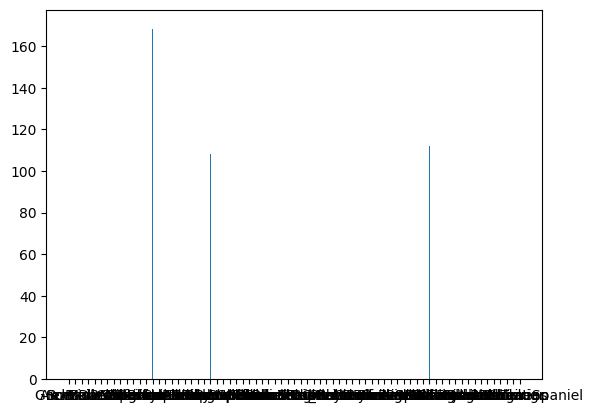

In [13]:
# distribución de clases

plt.hist(train_labels[:30000], bins=len(etiquetas))
plt.show()

In [14]:
unique, counts = np.unique(train_labels, return_counts=True)
unique, counts

(array(['Afghan', 'African Wild Dog', 'Airedale', 'American  Spaniel',
        'American Hairless', 'American Spaniel', 'Basenji', 'Basset',
        'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim',
        'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi',
        'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier',
        'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow',
        'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote',
        'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound',
        'French Bulldog', 'German Sheperd', 'Golden Retriever',
        'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael',
        'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor',
        'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese',
        'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull',
        'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler',
        'Saint Bernard', 'Schnauzer', 'Scotch Te

In [15]:
import torch

def build_model(D_in=32*32*3, H=100, D_out=10):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    ).cuda()



In [17]:
model = build_model()
test_input = torch.randn((64, 32*32*3)).cuda()
test_output = model(test_input)
test_output.shape

torch.Size([64, 10])

In [18]:
import numpy as np

train_images = np.array([np.array(img) for img, label in trainset])
X_test = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
y_test = np.array([label for img, label in testset])

X_train, X_val, X_subset = train_images[:40000], train_images[40000:], train_images[:5000]
y_train, y_val, y_subset = train_labels[:40000], train_labels[40000:], train_labels[:5000]

X_train.shape, X_val.shape, X_test.shape, X_subset.shape

((7476, 3, 32, 32), (0, 3, 32, 32), (1870, 3, 32, 32), (5000, 3, 32, 32))

In [19]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().cuda().view(-1, 32*32*3)
        self.Y = torch.from_numpy(Y).long().cuda()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [23]:
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas a números enteros utilizando LabelEncoder
encoder = LabelEncoder()
y_subset_numeric = encoder.fit_transform(y_subset)

# Crear el conjunto de datos con las etiquetas numéricas
dataset = Dataset(X_subset[:1], y_subset_numeric[:1])

# Crear el dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

# Comprobar la longitud del dataset
print(len(dataset))


dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

len(dataset)

1


1

In [27]:
epochs = 5
criterion = torch.nn.CrossEntropyLoss()
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for e in range(1, epochs+1):
    for x_b, y_b in dataloader:
        y_pred = model(x_b)
        loss = criterion(y_pred, y_b)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Epoch {e}/{epochs} loss {loss.item():.5f} y {y_b.item()} y_pred {torch.argmax(y_pred, axis=1).item()}")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
